 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix (1).png'


In [ ]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods

# skip intro
# fast forward
# subtitles
# favorite
# class Video():
#     def __init__(self):
#         self.title = None
#         self.length = timedelta()
#         self.link = generic_image
#         self.subtitles = False
#         self.sublang = 'English'
#         self.favs = []
     
#     def set_title(self):
#         title = input("What are you watching? ") 
#         self.title = title
        
#     def subson(self):
#         self.subtitles = True
#         print(f"{self.sublang} subtitles are now on")
              
#     def changelang(self):
#         sublang = input("What language? ")
#         self.sublang = sublang
#         print(f"subtitles are now in {self.sublang}")
              
#     def favorites(self):
        
#         fav_show = input("What show would you like to add to your favorites?")
#         self.favs.append(fav_show)
#         fav = input("Would you like to review your favorites?")
#         if fav == "y":
#             sleep(1)
#             print(f"Loading your favorites now..")
#             print(self.favs)
#         else:
#             print("Ok fine then....")
        
        
    
        
#     def play(self):
#         print(f"Now playing: {self.title}")
#         display(Image(self.link))
#     def pause(self):
#         print("Video Paused")
        
#     def __repr__(self):
#         return f"{self.title} is {self.length.seconds} seconds long. "

In [ ]:
# my_video = Video()
# my_video.set_title()
# my_video.changelang()
# my_video.favorites()

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [ ]:
# difficult to portray when we can see the code we are writing
# flask is a great example of abstraction as the user is only concerned
# with signing up and adding things to their collection
# When you use a website you can't see the code that is making the site run
# or the functionality in how data is being transferred
# A mixin is a class that provides method implementations
# for reuse by multiple related child classes. 
# However, the inheritance is not implying an is-a relationship. 
# A mixin doesn't define a new type.
# child is more specific

# class Episode2(Video):
#     def __init__(self):
#         super().__init__  #Opt2  Video.__init__(self)
#         self.number = 0
#         self.season = 0
#         self.date_aired = date()
#         self.summary = '' 
#         self.rating = 0
        
        

In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix (1).png'

In [2]:
class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image   
         
    
        
    def play(self):
        print(f"Now playing: {self.title}")
        display(Image(self.link))
    def pause(self):
        print("Video Paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "

In [3]:
#inheritance as a mixin
class Episode(Video):
    def __init__(self, data): #<-- add data for passing in our ep
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']: 
            self.link = data['image']['medium']
        else:
            self.link = generic_image
        
        
    

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [16]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        # Added cast TP
        self.cast = []
        self.crew = []
        
    def get_info(self, query = ""):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series?")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    #print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
                    
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
                
        # Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
        #API call for Cast & Crew TP
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/cast')
        if r.status_code == 200:
            casting = r.json()
        else:
            print(f"Cast error: status code {r.status_code}")
            return
        self.cast = [Cast(c) for c in casting]
        
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/crew')
        if r.status_code == 200:
            crews = r.json()
        else:
            print(f"Cast error: status code {r.status_code}")
            return
        self.crew = [Crew(c) for c in crews]
    
    def play_show(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
        
        
            
        
                    

In [ ]:
first_show = Series() 
first_show.get_info()

In [ ]:
first_show.play_show()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [25]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
    
    # add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
    
    # choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user. ")
                      
    # add to watchlist
    def add_to_watch_list(self, query = ""):
        show = Series()
        
        show.get_info(query)
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist! ")
    
    # choose from our watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
        
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.play_show()
        
        else:
            response = input(f"{watch} is not in your watch list.... would you like to add it y/n?")
            
            if response in ('yes', 'y'):
                self.add_to_watch_list(watch)
                print(self.watch_list)
                print("...........")
                sleep(2)
                print("...........")
                self.watch_list[-1].play_show()
    
    def get_cast(self, query = ""):
        show = Series()
        show.get_info(query)
        print("\nActor/Actress Name | Character Name")
        for cast in show.cast:
            print(f"\n{cast.act_name} | {cast.char}")
            display(Image(cast.link))
        
    def get_crew(self, query = ""):
        show = Series()
        show.get_info(query)
        print("\nActor/Crew Name | Crew Role")
        [print(f"\n{cast.crew_name} | {cast.crew_role}") for cast in show.crew]

    # run function to drive program
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose.user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch - pick something from your watch list
            Add - add a new user
            Cast - Search for cast list of a show
            Crew - Search for crew list of a show
            Quit - close the application
        """)
            
        while True: 
            response = input("What would you like to do? (search, watch, add, cast, quit) ")
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "cast":
                self.get_cast()
            elif response.lower() == "crew":
                self.get_crew()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside! ")
                break
                
            else:
                print("Invalid input, please choose from the list! ")
            
                        

In [26]:
codeflix = Theater()

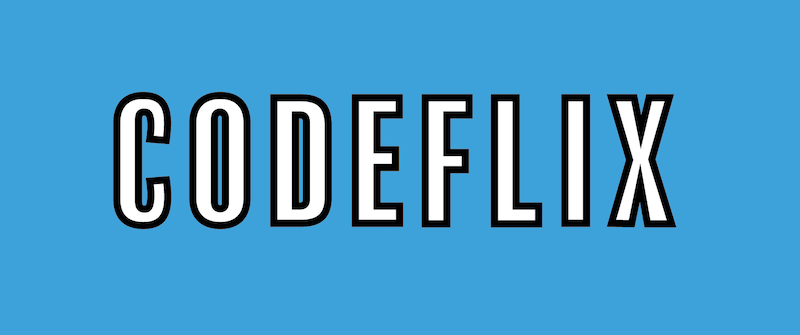

Create a profile: t
Users: 
T
Choose a user: t
t

            What would you like to do?
            
            Search - Search for shows
            Watch - pick something from your watch list
            Add - add a new user
            Quit - close the application
        
What would you like to do? (search, watch, add, cast, quit) cast
What is the name of the series?scrubs
Scrubs has 182 episodes.

Actor/Actress Name | Character Name

Donald Faison | Dr. Christopher Duncan Turk


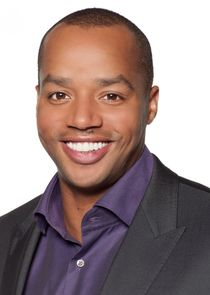


John C. McGinley | Dr. Percival "Perry" Ulysses Cox


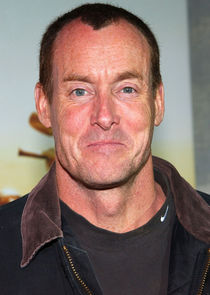


Ken Jenkins | Dr. Robert "Bob" Kelso


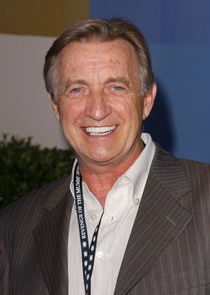


Zach Braff | Dr. John "J.D." Dorian


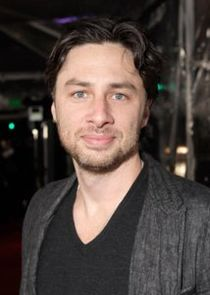


Sarah Chalke | Dr. Elliot Reid


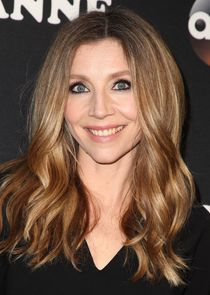


Neil Flynn | Janitor


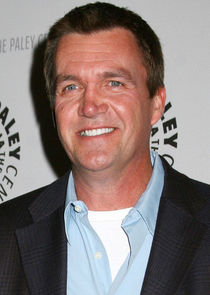


Judy Reyes | Nurse Carla Espinosa


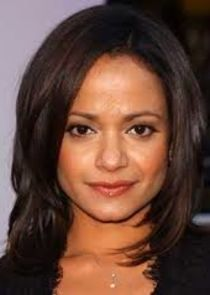


Eliza Coupe | Dr. Denise "Jo" Mahoney


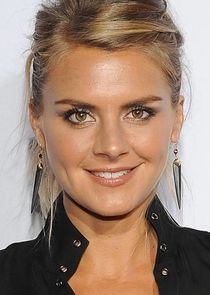


Christa Miller | Jordan Sullivan


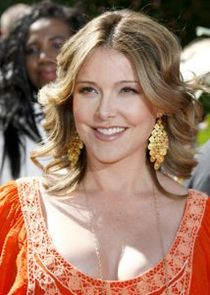


Kerry Bishé | Lucy Bennett


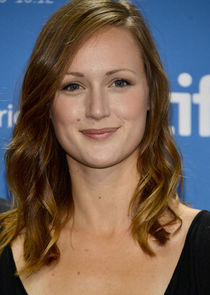


Michael Mosley | Drew Suffin


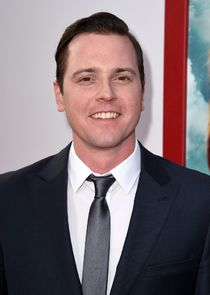


Dave Franco | Cole Aaronson


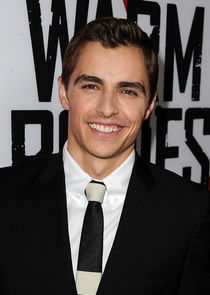

In [ ]:
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [21]:
class Cast(Video):
    def __init__(self, cast):
        self.act_name = cast['person']['name']
        self.char = cast['character']['name']
        if cast['person']['image']:
            self.link = cast['person']['image']['medium']

class Crew(Video):
    def __init__(self, crew):
        self.crew_name = crew['person']['name']
        self.crew_role = crew['type']
